In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
import nltk
from nltk.corpus import stopwords

In [29]:
import string
import re

In [125]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# We use this to literally download the "stopwords" package to our machines
# The literal file is saved in the <users>/AppData/Roaming... folder
# Hence, you only have to download it once
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        C:\Users\AJ\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [5]:
messages = [msg.rstrip() for msg in open("smsspamcollection/SMSSpamCollection")]

In [6]:
messages[:10]

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham\tOk lar... Joking wif u oni...',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham\tU dun say so early hor... U c already then say...',
 "ham\tNah I don't think he goes to usf, he lives around here though",
 "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv",
 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.',
 "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'spam\tWINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. 

In [7]:
len(messages)

5574

In [8]:
for msg_num, msg in enumerate(messages[:10]):
    print(msg_num, msg, "\n")

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... 

1 ham	Ok lar... Joking wif u oni... 

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 

3 ham	U dun say so early hor... U c already then say... 

4 ham	Nah I don't think he goes to usf, he lives around here though 

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv 

6 ham	Even my brother is not like to speak with me. They treat me like aids patent. 

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune 

8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [9]:
messages = pd.read_csv("smsspamcollection/SMSSpamCollection", sep="\t", names=["label", "message"])

In [10]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


EDA

In [11]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
messages.groupby("label").describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

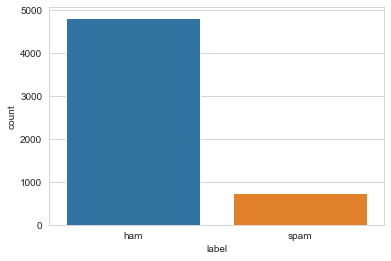

In [14]:
sns.countplot(x="label", data=messages)

In [15]:
messages["length"] = messages["message"].apply(len)

In [16]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


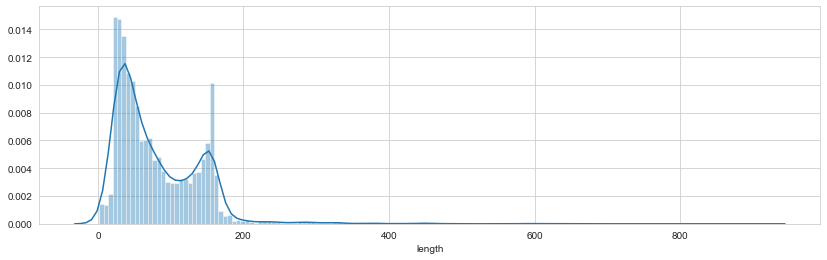

In [17]:
plt.figure(figsize=(14,4))
sns.distplot(messages["length"], bins=150)

In [18]:
messages["length"].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [19]:
messages[messages["length"]>900]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [20]:
messages[messages["length"]>900]["message"].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [21]:
messages.iloc[1085]["message"]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

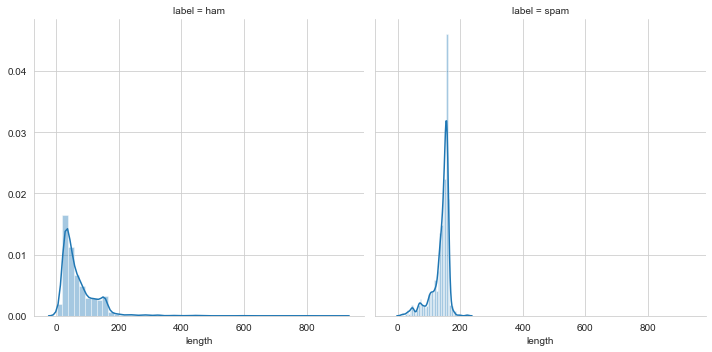

In [22]:
my_grid = sns.FacetGrid(data=messages, col="label", height=5)

my_grid.map(sns.distplot, "length")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001277C166A48>,
      dtype=object)

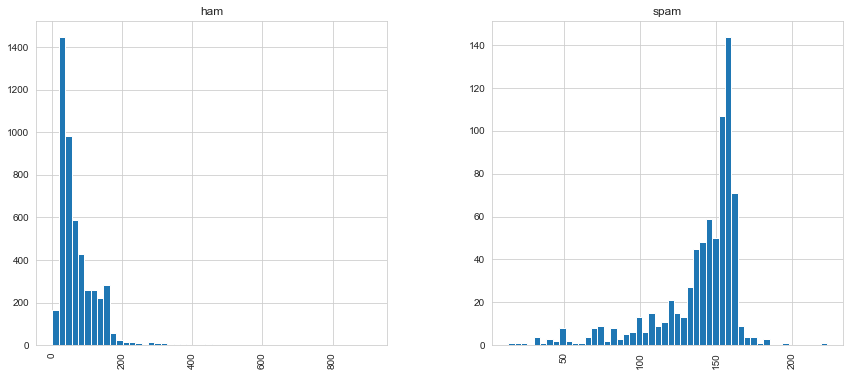

In [23]:
messages.hist(column="length", by="label", figsize=(14,6), bins=50)

**Clean the data AND Text Preprocessing. We need to convert the text data into numerical data!**

In [24]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

We will convert each message to a list of it's words, remove any punctuation, and remove any common words (stopwords)

In [26]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In the code below, we create a function that "tokenizes" each message. 

In [27]:
regex = re.compile('[%s]' % re.escape(string.punctuation))
exclude = set(stopwords.words('english'))
 
def text_tokenize(m):
    m1 = regex.sub('', m)
    return [word for word in m1.lower().split() if word not in exclude]

In [31]:
# Just to see how the above function works
messages["message"].head(5).apply(text_tokenize)

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [49]:
bow_transformer = CountVectorizer(analyzer=text_tokenize)

In [50]:
bow_transformer.fit(messages["message"])

CountVectorizer(analyzer=<function text_tokenize at 0x0000012775A5DA68>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [51]:
print(len(bow_transformer.vocabulary_))

9530


In [52]:
type(bow_transformer.vocabulary_)

dict

In [53]:
bow_transformer.vocabulary_
# You'll notice that words like "wont" did not get removed!

{'go': 3786,
 'jurong': 4696,
 'point': 6445,
 'crazy': 2485,
 'available': 1389,
 'bugis': 1860,
 'n': 5686,
 'great': 3883,
 'world': 9208,
 'la': 4858,
 'e': 3016,
 'buffet': 1858,
 'cine': 2200,
 'got': 3843,
 'amore': 1156,
 'wat': 8969,
 'ok': 6006,
 'lar': 4897,
 'joking': 4664,
 'wif': 9103,
 'u': 8626,
 'oni': 6038,
 'free': 3571,
 'entry': 3152,
 '2': 416,
 'wkly': 9160,
 'comp': 2316,
 'win': 9117,
 'fa': 3290,
 'cup': 2541,
 'final': 3415,
 'tkts': 8398,
 '21st': 436,
 'may': 5345,
 '2005': 423,
 'text': 8233,
 '87121': 849,
 'receive': 6848,
 'questionstd': 6738,
 'txt': 8610,
 'ratetcs': 6791,
 'apply': 1242,
 '08452810075over18s': 72,
 'dun': 3002,
 'say': 7208,
 'early': 3023,
 'hor': 4219,
 'c': 1910,
 'already': 1129,
 'nah': 5693,
 'dont': 2907,
 'think': 8309,
 'goes': 3800,
 'usf': 8760,
 'lives': 5060,
 'around': 1293,
 'though': 8328,
 'freemsg': 3579,
 'hey': 4114,
 'darling': 2605,
 '3': 527,
 'weeks': 9023,
 'word': 9194,
 'back': 1442,
 'id': 4340,
 'like': 5

In [54]:
# To get the Bag of Words for a particular message:
message_4 = messages["message"][3]
bow4 = bow_transformer.transform([message_4])

In [55]:
print(bow4)

  (0, 1129)	1
  (0, 1910)	1
  (0, 3002)	1
  (0, 3023)	1
  (0, 4219)	1
  (0, 7208)	2
  (0, 8626)	2


In [56]:
type(bow4)

scipy.sparse.csr.csr_matrix

In [57]:
print(bow4.shape)

(1, 9530)


In [58]:
bow_transformer.get_feature_names()[8626]

'u'

In [59]:
bow_transformer.get_feature_names()[7208]

'say'

In [60]:
messages["message"][3]

'U dun say so early hor... U c already then say...'

Let's generate the bow for the entire DF of messages, and see how/why the entire bow counts is a "sparse" matrix

In [61]:
messages_bow = bow_transformer.transform(messages["message"])

In [62]:
print("Shape of the sparse matrix: ", messages_bow.shape)

Shape of the sparse matrix:  (5572, 9530)


In [63]:
print("Number of non-zero entries: ", messages_bow.nnz)

Number of non-zero entries:  50101


In [66]:
sparcity = messages_bow.nnz / (messages_bow.shape[0]*messages_bow.shape[1]) * 100
print("Sparcity of the sparce matrix: ", sparcity, "%")

Sparcity of the sparce matrix:  0.09435010459281869 %


Now, we compute the TF-IDF

In [68]:
tfidf_transformer = TfidfTransformer()

In [69]:
tfidf_transformer.fit(messages_bow)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [70]:
tfidf4 = tfidf_transformer.transform(bow4)

In [71]:
tfidf4

<1x9530 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [72]:
print(tfidf4)

  (0, 8626)	0.31949158769666564
  (0, 7208)	0.5597000940482765
  (0, 4219)	0.46452762500729494
  (0, 3023)	0.33557436526898854
  (0, 3002)	0.30912546538910485
  (0, 1910)	0.2870370340589675
  (0, 1129)	0.27985004702413824


In [85]:
print(tfidf4.data)

[0.31949159 0.55970009 0.46452763 0.33557437 0.30912547 0.28703703
 0.27985005]


In [86]:
tfidf4.data[1]

0.5597000940482765

In [82]:
type(tfidf4.data)

numpy.ndarray

In [87]:
# Just checking if it's indeed a unit vector
x = tfidf4.data
length=0
for num in x:
    length+= num **2
np.sqrt(length)
    

1.0

In [95]:
# Can check the IDF of a particular word in the entire *document*
my_word = bow_transformer.vocabulary_["university"]
tfidf_transformer.idf_[my_word]

8.239394426449646

In [93]:
tfidf_transformer.idf_.shape

(9530,)

In [96]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [102]:
messages_tfidf

<5572x9530 sparse matrix of type '<class 'numpy.float64'>'
	with 50101 stored elements in Compressed Sparse Row format>

In [101]:
print(messages_tfidf)

  (0, 9208)	0.22959578341739934
  (0, 8969)	0.189831293914186
  (0, 6445)	0.26040801821775666
  (0, 5686)	0.17971478086009218
  (0, 4858)	0.2812662013316978
  (0, 4696)	0.3329366192459962
  (0, 3883)	0.18530789226463862
  (0, 3843)	0.15624436027998514
  (0, 3786)	0.15108467632518396
  (0, 3016)	0.19735531534420864
  (0, 2485)	0.2578364932928782
  (0, 2200)	0.2812662013316978
  (0, 1860)	0.2812662013316978
  (0, 1858)	0.3178239908077686
  (0, 1389)	0.2531713715948601
  (0, 1156)	0.3329366192459962
  (1, 9103)	0.4230047412305557
  (1, 8626)	0.19596103729644757
  (1, 6038)	0.5357016513330057
  (1, 6006)	0.26863679646521466
  (1, 4897)	0.40016667592540756
  (1, 4664)	0.5132162356950317
  (2, 9160)	0.18823702154324515
  (2, 9117)	0.14671124801712349
  (2, 8610)	0.12468874378265443
  :	:
  (5568, 3805)	0.31428191974562797
  (5568, 3558)	0.4864681881994221
  (5568, 3180)	0.558158973011152
  (5568, 1421)	0.3806451051797618
  (5569, 8002)	0.520467167163554
  (5569, 7626)	0.520467167163554
  (55

Finally, we can train our NLP model to help classify messages as spam vs ham. We will create a "naive Bayes classifier".

In [104]:
spam_detect_model = MultinomialNB()

In [105]:
X = messages_tfidf
y = messages["label"]

spam_detect_model.fit(X,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Can pass in all original messages to see how it predicts...? (We don't have test data)

In [106]:
predictions = spam_detect_model.predict(messages_tfidf)

In [112]:
predictions # Type -> NP array

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [113]:
messages["label"] # Type -> PD series

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [118]:
print(confusion_matrix(predictions, messages["label"]))
print("\n\n\n")
print(classification_report(predictions, messages["label"]))

[[4825  125]
 [   0  622]]




              precision    recall  f1-score   support

         ham       1.00      0.97      0.99      4950
        spam       0.83      1.00      0.91       622

    accuracy                           0.98      5572
   macro avg       0.92      0.99      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [116]:
off_count=0
for i in range(len(messages["label"])):
    if messages["label"][i] != predictions[i]:
        off_count += 1
off_count

125

**Let's actually do it properly, and split our data**

In [123]:
X = messages["message"]
y = messages["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [121]:
pipeline = Pipeline( steps = [
    ("bow", CountVectorizer(analyzer=text_tokenize)),
    ("tfidf", TfidfTransformer()),
    ("classifier", MultinomialNB())    
])

In [124]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_tokenize at 0x0000012775A5DA68>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [126]:
predictions2 = pipeline.predict(X_test)

In [127]:
print(confusion_matrix(predictions2, y_test))
print("\n\n\n")
print(classification_report(predictions2, y_test))

[[1448   57]
 [   0  167]]




              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1505
        spam       0.75      1.00      0.85       167

    accuracy                           0.97      1672
   macro avg       0.87      0.98      0.92      1672
weighted avg       0.97      0.97      0.97      1672

